In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [5]:
# LIBRARIES
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline


In [116]:
!python --version


Python 3.11.11


In [6]:
print("nympy",np.__version__)
print("pandas",pd.__version__)
print("scklearn",sklearn.__version__)

nympy 1.26.4
pandas 2.2.3
scklearn 1.2.2


# Read and understand the data

In [7]:
df= pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')



In [8]:
df.sample(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4939,9975-SKRNR,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,18.90,18.9,No
2440,2171-UDMFD,Male,0,Yes,Yes,32,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),19.45,674.55,No
1272,1257-SXUXQ,Male,0,Yes,Yes,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.45,86.05,No
6855,8738-JOKAR,Female,0,No,No,42,Yes,No,DSL,Yes,...,No,Yes,No,Yes,One year,Yes,Mailed check,67.70,2882.25,No


> from aboe we can se we don't need customer id as it not important for training a model
> so we will drop it

In [9]:
df.drop('customerID',axis='columns',inplace=True)


In [10]:
df.sample(6)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5424,Male,1,Yes,No,65,Yes,Yes,Fiber optic,Yes,Yes,No,No,Yes,No,Two year,Yes,Credit card (automatic),92.70,5968.4,No
5582,Female,0,No,No,48,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.00,1183.05,No
4235,Female,1,Yes,No,56,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,One year,No,Electronic check,95.65,5471.75,No
6628,Female,0,No,No,7,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,One year,Yes,Mailed check,94.05,633.45,No
6681,Male,1,No,No,3,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,No,Electronic check,91.05,289.1,Yes
3371,Female,0,Yes,Yes,11,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.25,180.3,Yes


In [11]:
df.dtypes



gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
df.shape

(7043, 20)

In [14]:
df.duplicated().sum()

22

In [15]:
# remove the duplicates from original dataframe
df.drop_duplicates(inplace=True)


In [16]:
df.duplicated().sum()

0

In [17]:
df.sample(6)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3311,Female,0,No,No,48,No,No phone service,DSL,Yes,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,44.80,2104.55,No
3712,Male,0,No,No,44,Yes,No,DSL,Yes,No,No,Yes,Yes,No,One year,No,Electronic check,65.40,2774.55,No
3982,Male,0,No,Yes,71,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,24.35,1654.6,No
1677,Male,0,Yes,Yes,6,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.40,153.3,No
199,Male,0,No,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.75,20.75,No
5902,Female,0,Yes,No,9,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,No,Mailed check,50.85,466.6,No


In [18]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7021.000000,7021.000000,7021.000000
mean,0.162512,32.469449,64.851894
std,0.368947,24.534965,30.069001
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.750000
50%,0.000000,29.000000,70.400000
75%,0.000000,55.000000,89.900000
max,1.000000,72.000000,118.750000


In [19]:
print(f' Totalcharge: {df.TotalCharges.values}')
print(df.MonthlyCharges.values)



 Totalcharge: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
[ 29.85  56.95  53.85 ...  29.6   74.4  105.65]


> we found TotalCharges as an string so we will convert it into number column

In [20]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7021, dtype: object

In [21]:
# pd.to_numeric(df.TotalCharges)
# as some spaces are in present in the values as its an string so lets tackle with them
pd.to_numeric(df.TotalCharges,errors='coerce')
# returns numpy array

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7021, dtype: float64

In [22]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7021, dtype: bool

In [23]:
    df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [24]:
df.iloc[5218]

gender                        Female
SeniorCitizen                      1
Partner                          Yes
Dependents                        No
tenure                            43
PhoneService                     Yes
MultipleLines                    Yes
InternetService          Fiber optic
OnlineSecurity                    No
OnlineBackup                      No
DeviceProtection                 Yes
TechSupport                      Yes
StreamingTV                      Yes
StreamingMovies                  Yes
Contract                    One year
PaperlessBilling                 Yes
PaymentMethod       Electronic check
MonthlyCharges                107.55
TotalCharges                  4533.9
Churn                            Yes
Name: 5229, dtype: object

In [25]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 
 17  

In [26]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7021.000000,7021.000000,7021.000000
mean,0.162512,32.469449,64.851894
std,0.368947,24.534965,30.069001
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.750000
50%,0.000000,29.000000,70.400000
75%,0.000000,55.000000,89.900000
max,1.000000,72.000000,118.750000


> as we can se above have  11 rows contaning value nan for totalcharges so we will drop them 

In [27]:
df1=df[df.TotalCharges!=' ']

In [28]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [29]:
df1.shape

(7010, 20)

In [30]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

/tmp/ipykernel_35/695980592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges=pd.to_numeric(df1.TotalCharges)


In [31]:
df1.TotalCharges.dtypes

dtype('float64')

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7010 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7010 non-null   object 
 1   SeniorCitizen     7010 non-null   int64  
 2   Partner           7010 non-null   object 
 3   Dependents        7010 non-null   object 
 4   tenure            7010 non-null   int64  
 5   PhoneService      7010 non-null   object 
 6   MultipleLines     7010 non-null   object 
 7   InternetService   7010 non-null   object 
 8   OnlineSecurity    7010 non-null   object 
 9   OnlineBackup      7010 non-null   object 
 10  DeviceProtection  7010 non-null   object 
 11  TechSupport       7010 non-null   object 
 12  StreamingTV       7010 non-null   object 
 13  StreamingMovies   7010 non-null   object 
 14  Contract          7010 non-null   object 
 15  PaperlessBilling  7010 non-null   object 
 16  PaymentMethod     7010 non-null   object 
 17  

In [33]:
df1.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7010.000000,7010.000000,7010.000000,7010.000000
mean,0.162767,32.520399,64.888666,2290.353388
std,0.369180,24.520441,30.064769,2266.820832
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,408.312500
50%,0.000000,29.000000,70.400000,1403.875000
75%,0.000000,56.000000,89.900000,3807.837500
max,1.000000,72.000000,118.750000,8684.800000


In [34]:
# Check if there are any missing values at all
print(df1.isnull().values.any())
print('\n')
#Check number of missing values in each column
print(df1.isnull().sum())

False


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


> so our data is clean

In [35]:
df1["Churn"].value_counts()
# returns a series 

Churn
No     5153
Yes    1857
Name: count, dtype: int64

# Data visualization

Text(0.5, 1.0, 'churn(yes/no)')

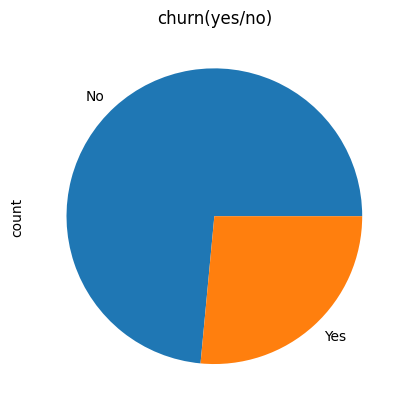

In [36]:
df1["Churn"].value_counts().plot(kind="pie")
plt.title("churn(yes/no)")

In [37]:
print(df.groupby("Churn")["MonthlyCharges"].mean())
print("\n")
print(df.groupby("Churn")["tenure"].mean())
print("\n")
print(df.groupby("Contract")["MonthlyCharges"].mean())

Churn
No     61.344878
Yes    74.604308
Name: MonthlyCharges, dtype: float64


Churn
No     37.640782
Yes    18.088853
Name: tenure, dtype: float64


Contract
Month-to-month    66.572203
One year          65.048608
Two year          60.770413
Name: MonthlyCharges, dtype: float64


Text(0.5, 0, 'contract_type')

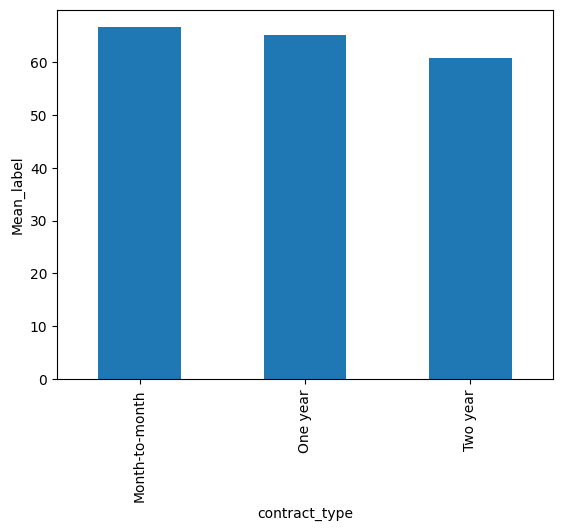

In [38]:
df.groupby("Contract")["MonthlyCharges"].mean().plot(kind="bar")
plt.ylabel("Mean_label")
plt.xlabel("contract_type")

*above we can see that as time period increase the mean label decreasing*

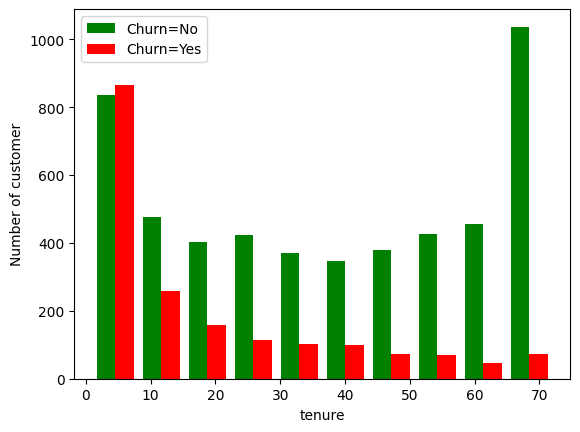

In [39]:
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure
plt.hist([tenure_churn_no,tenure_churn_yes],color=['green','red'],label=['Churn=No','Churn=Yes'])
plt.xlabel('tenure')
plt.ylabel('Number of customer')
plt.legend()
plt.show()

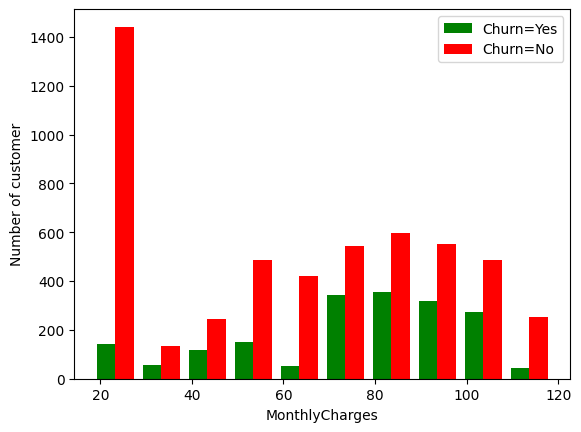

In [40]:
mc_churn_no=df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes=df1[df1.Churn=='Yes'].MonthlyCharges
plt.hist([mc_churn_yes,mc_churn_no],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.xlabel('MonthlyCharges')
plt.ylabel('Number of customer')
plt.legend()
plt.show()

In [41]:
def unique_val(df1) :
    for column in df1 :
      if df1[column].dtype=='object' :
         print(f'{column} : {df1[column].unique()}')

> replacing unnecessary content

In [42]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

# as it means no 

/tmp/ipykernel_35/2633397347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
/tmp/ipykernel_35/2633397347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [43]:
unique_val(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [44]:
# lets convert the text into no , only yes/no column getting used
yes_no_col=['Partner','Dependents','MultipleLines','PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
           'StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for columns in yes_no_col :   
   df1[columns].replace({'Yes':1,'No':0},inplace=True)

/tmp/ipykernel_35/1705608413.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[columns].replace({'Yes':1,'No':0},inplace=True)
/tmp/ipykernel_35/1705608413.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[columns].replace({'Yes':1,'No':0},inplace=True)
/tmp/ipykernel_35/1705608413.py:5:

In [45]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,Female,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,Female,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,Male,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [46]:
df1.shape

(7010, 20)

In [47]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

/tmp/ipykernel_35/698335744.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({'Female':1,'Male':0},inplace=True)
/tmp/ipykernel_35/698335744.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)
/tmp/ipykernel_35/698335

In [48]:
unique_val(df1)

InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [49]:
df1['gender'].unique()

array([1, 0])

In [50]:

    for column in df1 :
      print(f'{column} : {df1[column].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [51]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])

In [52]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,0,0,0,0,34,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,0,0,0,0,2,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,0,0,0,0,45,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,1,0,0,0,2,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,True,False,False,False,True,False,False,False,False,True
7039,1,0,1,1,72,1,1,0,1,1,...,False,True,False,False,True,False,False,True,False,False
7040,1,0,1,1,11,0,0,1,0,0,...,True,False,False,True,False,False,False,False,True,False
7041,0,1,1,0,4,1,1,0,0,0,...,False,True,False,True,False,False,False,False,False,True


In [53]:
df2.replace({'True': 1, 'False': 0}, inplace=True)


In [54]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [55]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3513,0,0,1,1,11,1,0,0,0,0,...,False,False,True,True,False,False,True,False,False,False
3481,1,0,0,0,4,1,1,0,0,0,...,True,False,False,True,False,False,False,False,True,False
5219,0,0,0,0,1,1,0,0,0,0,...,False,False,True,True,False,False,False,False,False,True


> as u can see that few columns are bool so let convert them into numeric while encoding

In [56]:
col=['InternetService_DSL','InternetService_Fiber optic', 'InternetService_No','Contract_Month-to-month', 
     'Contract_One year','Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
     'PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']
for cols in col:
    df2[cols].replace({True : 1, False : 0}, inplace=True)

/tmp/ipykernel_35/2717911931.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2[cols].replace({True : 1, False : 0}, inplace=True)
/tmp/ipykernel_35/2717911931.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2[cols].replace({True : 1, False : 0}, inplace=True)


In [57]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [58]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No             

In [59]:
col=['InternetService_DSL','InternetService_Fiber optic', 'InternetService_No','Contract_Month-to-month', 
     'Contract_One year','Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
     'PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']
for cols in col:
    df2[cols].astype(int)

In [60]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No             

In [61]:
df2.shape

(7010, 27)

# Scaling --->

In [62]:
from sklearn.preprocessing import MinMaxScaler
# will scale valus in 0-1
scaler=MinMaxScaler()


In [63]:
column_to_scale=['tenure','MonthlyCharges','TotalCharges']
df2[column_to_scale]=scaler.fit_transform(df2[column_to_scale])    



In [64]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6252,0,0,1,1,0.690141,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
6688,1,0,1,1,0.154930,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
2075,0,1,0,0,0.774648,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0


> now lets see and print the value to have a look on scaled values

In [65]:
for col in df2 :
    print(f'{col} :{df2[col].unique()}')

gender :[1 0]
SeniorCitizen :[0 1]
Partner :[1 0]
Dependents :[0 1]
tenure :[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService :[0 1]
MultipleLines :[0 1]
OnlineSecurity :[0 1]
OnlineBackup :[1 0]
DeviceProtection :[0 1]
TechSupport :[

> from above lda graph, we can some conclusion-
> the dots seems to be overlapped which leads to that LDA couldn’t find much separation
> Features are not informative for class labels.

# Model Training --->

In [66]:
x=df2.drop('Churn',axis=True)
y=df2['Churn']


In [67]:
x.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [68]:
import joblib 

In [70]:
joblib.dump(x.columns,"model_columns.pkl")

['model_columns.pkl']

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)


In [72]:
print(x_train.shape)
print(x_test.shape)

(5608, 26)
(1402, 26)


In [73]:
x_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4796,1,0,1,0,0.760563,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
342,1,0,1,1,0.915493,1,1,1,1,1,...,1,0,0,1,0,0,1,0,0,0
1279,0,0,1,0,0.338028,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
5357,0,0,1,0,0.830986,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
181,1,0,0,0,0.000000,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
6034,1,0,0,0,0.084507,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
3431,0,0,1,0,0.323944,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
222,0,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
4189,1,0,1,1,0.957746,1,1,1,1,0,...,1,0,0,0,1,0,0,1,0,0
2475,1,0,0,0,0.732394,1,0,1,1,1,...,0,1,0,0,0,1,0,0,0,1


In [74]:
len(x_train.columns)

26

In [75]:
import tensorflow as tf
from tensorflow import keras

model_dp= keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')

])

model_dp.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model_dp.fit(x_train,y_train,epochs=5)

2025-06-19 12:17:21.927588: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750335442.205232      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750335442.285294      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-19 12:17:39.917801: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7416 - loss: 0.5463
Epoch 2/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7891 - loss: 0.4344
Epoch 3/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7946 - loss: 0.4187
Epoch 4/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7948 - loss: 0.4301
Epoch 5/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7974 - loss: 0.4099


In [76]:
model_dp.evaluate(x_test,y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7837 - loss: 0.4554


[0.437998503446579, 0.7938659191131592]

In [77]:
yp=model_dp.predict(x_test)
yp[:5]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.03731721],
       [0.05815259],
       [0.5268108 ],
       [0.05905771],
       [0.12577386]], dtype=float32)

In [78]:
y_test[:5]

9       0
5693    0
1189    0
3827    0
40      0
Name: Churn, dtype: int64

In [79]:
y_pred=[]
for element  in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

> saving model using cloudpickle

In [80]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4228,0,0,1,1,0.000000,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
6721,1,0,1,1,0.676056,1,1,0,1,0,...,1,0,0,0,0,1,1,0,0,0
20,0,1,0,0,0.000000,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0


In [81]:
from sklearn.preprocessing import StandardScaler
sclaer =StandardScaler()

In [82]:
x_train=scaler.fit_transform(x_train)

In [83]:

joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [84]:
x_train

array([[1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [85]:
x_test=scaler.fit_transform(x_test)


In [86]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [87]:
from sklearn.metrics import accuracy_score
def modelperformance(predictions):
    print("accuracy score of model is {}".format(accuracy_score(y_test,y_pred)))

In [88]:
param_grid={
    "n_neighbors":[3,5,7,9],
    "weights" : ["uniform","distance"],
    
}

# gridsearch (knn)

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()

In [91]:
log_model.fit(x_train,y_train)

LogisticRegression()

In [92]:
y_pred_log=log_model.predict(x_test)

In [93]:
modelperformance(y_pred_log)

accuracy score of model is 0.7938659058487875


In [94]:
from sklearn.neighbors import KNeighborsClassifier

In [95]:
param_grid={
    "n_neighbors":[3,5,7,9],
    "weights" : ["uniform","distance"],
    
}

In [96]:
gridkn = GridSearchCV(KNeighborsClassifier(),
                      param_grid,
                      cv=5
                     )

In [97]:
gridkn.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [98]:
gridkn.best_params_

{'n_neighbors': 9, 'weights': 'uniform'}

In [99]:
y_pred_knn=gridkn.predict(x_test)

In [100]:
modelperformance(y_pred_knn)

accuracy score of model is 0.7938659058487875


#  optuna for svm

In [101]:
from sklearn.svm import SVC
import optuna

In [102]:
from sklearn.model_selection import cross_val_score


In [103]:
def objective(trial):
    C = trial.suggest_float('C',0.1,100,log =True)
    kernel =trial.suggest_categorical('kernel',['linear','rbf','poly','sigmoid'])
    gamma=trial.suggest_categorical('gamma',['scale','auto'])

    model = SVC(C=C,kernel=kernel,gamma=gamma,random_state=42)
    score= cross_val_score(model,x_train,y_train,cv=3,scoring='accuracy').mean()
    return score



In [104]:
study=optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler())
study.optimize(objective,n_trials=30)


[I 2025-06-19 12:22:45,933] A new study created in memory with name: no-name-c56bb745-d314-4366-b211-a8548541cb08
[I 2025-06-19 12:22:47,671] Trial 0 finished with value: 0.7105931374933357 and parameters: {'C': 42.198319323891965, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 0 with value: 0.7105931374933357.
[I 2025-06-19 12:22:49,561] Trial 1 finished with value: 0.7105930421198101 and parameters: {'C': 18.681810706115684, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 0 with value: 0.7105931374933357.
[I 2025-06-19 12:22:51,073] Trial 2 finished with value: 0.7628379918531935 and parameters: {'C': 0.6787096646550906, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 2 with value: 0.7628379918531935.
[I 2025-06-19 12:22:53,421] Trial 3 finished with value: 0.7974340706660601 and parameters: {'C': 3.240549984247942, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 3 with value: 0.7974340706660601.
[I 2025-06-19 12:22:54,954] Trial 4 finished with value: 0.796720390

In [105]:
print("Best score:", study.best_value)
print("Best parameters:", study.best_trial.params)


Best score: 0.8038532811830895
Best parameters: {'C': 2.5534171536962402, 'kernel': 'rbf', 'gamma': 'auto'}


In [106]:
# best parameters for training
best_para=study.best_trial.params

# building the final model with best parameters
best_model =SVC(**best_para,random_state=42)

# fit the model on training data
best_model.fit(x_train,y_train)

y_pred_svc=best_model.predict(x_test)

modelperformance(y_pred_svc)

accuracy score of model is 0.7938659058487875


> so we get an accuracy of 79%

# random forest

In [110]:
 from sklearn.ensemble import RandomForestClassifier
rfc_model=  RandomForestClassifier()

In [111]:
param_grid={
    "n_estimators":[32,64,128,256],
    "max_depth" : [2,3,4],
    "bootstrap" :[True,False]
}

In [112]:
grid_rfc=GridSearchCV(rfc_model,param_grid,cv=5)
grid_rfc.fit(x_train,y_train)

y_pred_rfc=grid_rfc.predict(x_test)

modelperformance(y_pred_rfc)

accuracy score of model is 0.7938659058487875


> all have same  accuracy
> 

# Final model

In [115]:
joblib.dump(best_model,"model.pkl")

['model.pkl']

In [ ]:
# models to try with clear concepts
# ridge

> looking above and trying various models which results same accuracy , best_model is trained on svm algo
> more required  changes will be made by time 